In [1]:
import requests
import json
import pandas as pd
from pprint import pprint
from citipy import citipy
import matplotlib.pyplot as plt
import numpy as np
import gmaps
import os
import csv
api_keys = os.environ.get('weather_key')





In [2]:
lat_long = []
cities = []

lat = np.random.uniform(low=-90.000, high=90.000, size=1300)
long = np.random.uniform(low=-180.000, high=180.000, size=1300)
lat_long = zip(lat, long)

for lat_long in lat_long:
    city = citipy.nearest_city(lat_long[0], lat_long[1]).city_name
    if city not in cities:
        cities.append(city)
len(cities)




551

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_keys

In [4]:
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

record = 1

print(f"Beginning Data Retrieval")
print(f"-------------------------------")

for city in cities:  
    

    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue



Beginning Data Retrieval
-------------------------------
Processing Record 1 | Garoowe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58c00e1ffd54b2b42b437b9756497865&q=garowe
City not found. Skipping...
Processing Record 2 | Sīwah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58c00e1ffd54b2b42b437b9756497865&q=siva
City not found. Skipping...
Processing Record 3 | Konëvo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58c00e1ffd54b2b42b437b9756497865&q=konevo
City not found. Skipping...
Processing Record 4 | Poum
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58c00e1ffd54b2b42b437b9756497865&q=poum
City not found. Skipping...
Processing Record 5 | Ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58c00e1ffd54b2b42b437b9756497865&q=ushuaia
City not found. Skipping...
Processing Record 6 | Longyearbyen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58c00e1ff

In [5]:
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}
weather_dt = pd.DataFrame(weatherpy_dict)

weather_dt.count()

City          510
Cloudiness    510
Country       510
Date          510
Humidity      510
Lat           510
Lng           510
Max Temp      510
Wind Speed    510
dtype: int64

In [6]:
weather_dt.to_csv('weather_dt.csv')

weather_dt.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Garoowe,97,SO,1628090939,34,8.4054,48.4845,88.81,22.44
1,Sīwah,0,EG,1628090939,13,29.2041,25.5195,106.56,6.98
2,Konëvo,7,RU,1628090940,41,62.1215,39.3192,66.20,11.18
3,Poum,99,NC,1628090940,71,-20.2333,164.0167,70.86,7.83
4,Ushuaia,75,AR,1628090703,41,-54.8000,-68.3000,55.06,18.41


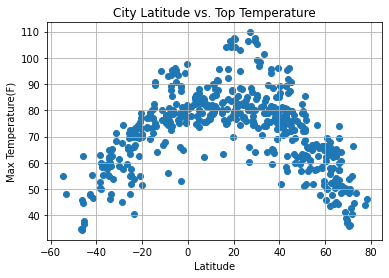

<Figure size 432x288 with 0 Axes>

In [7]:
plt.scatter(weather_dt['Lat'], weather_dt['Max Temp'], marker='o')
plt.title('City Latitude vs. Top Temperature')
plt.ylabel('Max Temperature(F)')
plt.xlabel('Latitude')
plt.grid(True)


plt.show()
plt.savefig('x_tmp_vs_lat.png')

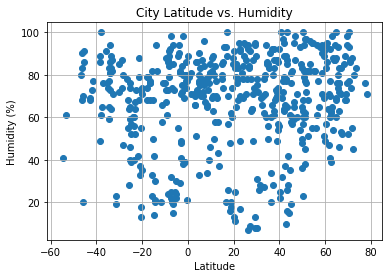

<Figure size 432x288 with 0 Axes>

In [8]:
plt.scatter(weather_dt['Lat'], weather_dt['Humidity'], marker='o')
plt.title('City Latitude vs. Humidity')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)


plt.show()
plt.savefig('lat_vs_humidity.png')

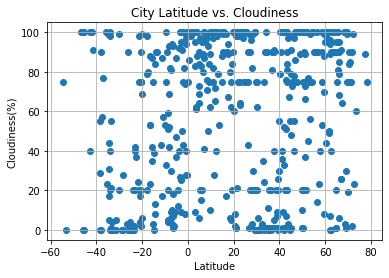

<Figure size 432x288 with 0 Axes>

In [9]:
plt.scatter(weather_dt['Lat'], weather_dt['Cloudiness'], marker='o')
plt.title('City Latitude vs. Cloudiness')
plt.ylabel("Cloudiness(%)")
plt.xlabel('Latitude')
plt.grid(True)

plt.show()
plt.savefig('lat_vs_cloudiness.png')

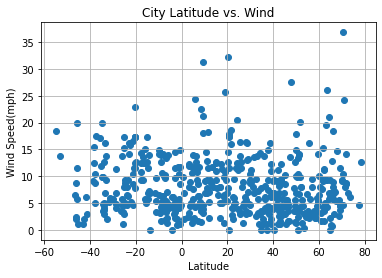

<Figure size 432x288 with 0 Axes>

In [10]:
plt.scatter(weather_dt["Lat"], weather_dt["Wind Speed"], marker="o")
plt.title("City Latitude vs. Wind")
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()
plt.savefig('lat_vs_wind.png')

In [ ]:
#vacationpy

gmaps.configure(api_key = gmap_key)